In [8]:
import yfinance as yf
import pandas as pd
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt

In [9]:
# Question 1 - Extracting Tesla Stock Data Using yfinance
# Extract Tesla stock data
tesla_stock = yf.Ticker("TSLA")
tesla_data = tesla_stock.history(period="max")

# Display Tesla stock data
tesla_data.reset_index(inplace=True)
print("Tesla Stock Data (Sample):")
print(tesla_data.head())

# Save Tesla stock data output for display
tesla_data.head().to_csv("tesla_stock_sample.csv", index=False)

# --- End of Question 1 ---

Tesla Stock Data (Sample):
                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [22]:
pip install requests pandas beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [27]:
# Question 2

import requests
import pandas as pd
from bs4 import BeautifulSoup

# Step 1: Download the webpage using requests
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)

# Step 2: Save the text of the response as a variable named html_data
html_data = response.text

# Step 3: Parse the html data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Step 4: Extract the table using the correct index (1 for Tesla Revenue table)
table = soup.find_all("tbody")[1]

# Step 5: Initialize an empty DataFrame
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Step 6: Loop through the rows and extract data
for row in table.find_all("tr"):
    columns = row.find_all("td")
    if len(columns) == 2:  # Ensure we have both Date and Revenue columns
        date = columns[0].text.strip()
        revenue = columns[1].text.strip()
        
        # Append the data to the DataFrame using pd.concat
        new_row = pd.DataFrame({"Date": [date], "Revenue": [revenue]})
        tesla_revenue = pd.concat([tesla_revenue, new_row], ignore_index=True)

# Step 7: Clean the "Revenue" column by removing commas and dollar signs
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(r',|\$', "", regex=True)

# Step 8: Drop any null or empty values in the Revenue column
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

# Step 9: Display the last 5 rows of the DataFrame
print(tesla_revenue.tail())


          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


In [16]:
# Question 3 - Extracting GameStop Stock Data Using yfinance
# Extract GameStop stock data
gme_stock = yf.Ticker("GME")
gme_data = gme_stock.history(period="max")

# Display GameStop stock data
gme_data.reset_index(inplace=True)
print("GameStop Stock Data (Sample):")
print(gme_data.head())

# Save GameStop stock data output for display
gme_data.head().to_csv("gme_stock_sample.csv", index=False)

# --- End of Question 3 ---


GameStop Stock Data (Sample):
                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [24]:
# Question 4
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Step 1: Download the webpage using requests
url_2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response_2 = requests.get(url_2)

# Step 2: Save the text of the response as a variable named html_data_2
html_data_2 = response_2.text

# Step 3: Parse the html data using BeautifulSoup
soup_2 = BeautifulSoup(html_data_2, 'html.parser')

# Step 4: Extract the table using the correct index (0 for GME Revenue table)
table_2 = soup_2.find_all("tbody")[0]

# Step 5: Initialize an empty DataFrame
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Step 6: Loop through the rows and extract data
for row in table_2.find_all("tr"):
    columns = row.find_all("td")
    if len(columns) == 2:  # Ensure we have both Date and Revenue columns
        date = columns[0].text.strip()
        revenue = columns[1].text.strip()
        
        # Append the data to the DataFrame using pd.concat
        new_row = pd.DataFrame({"Date": [date], "Revenue": [revenue]})
        gme_revenue = pd.concat([gme_revenue, new_row], ignore_index=True)

# Step 7: Clean the "Revenue" column by removing commas and dollar signs
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(r',|\$', "", regex=True)

# Step 8: Drop any null or empty values in the Revenue column
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

# Step 9: Display the last 5 rows of the DataFrame
print(gme_revenue.tail())

    Date Revenue
11  2009    8806
12  2008    7094
13  2007    5319
14  2006    3092
15  2005    1843


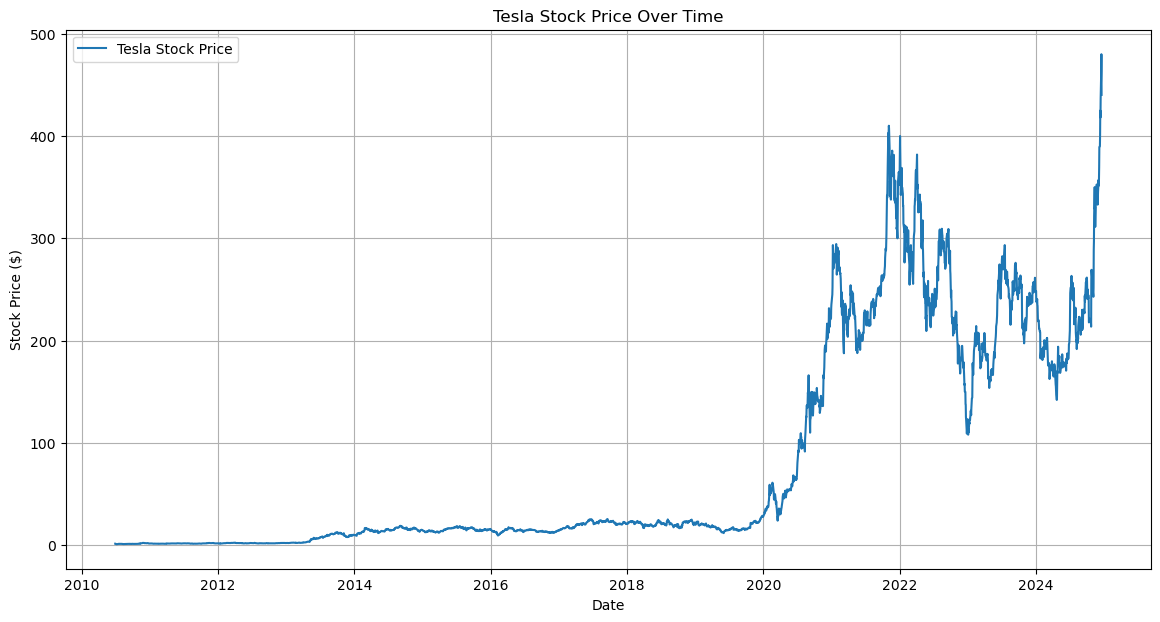

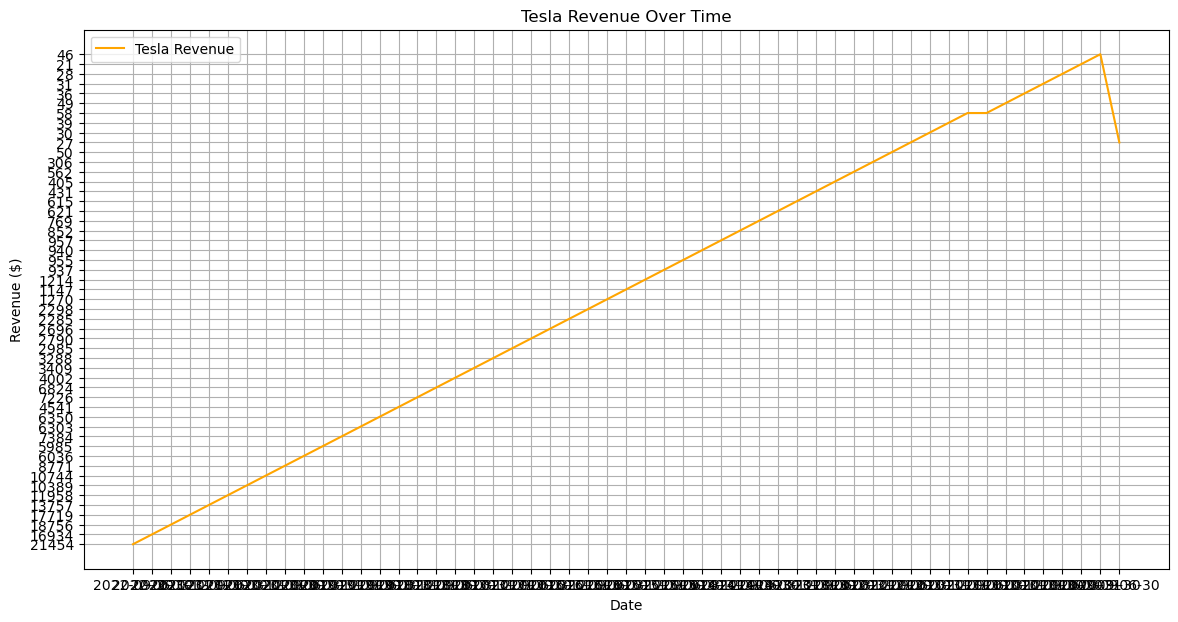

In [25]:
# Question 5 - Tesla Stock and Revenue Dashboard
plt.figure(figsize=(14, 7))
plt.plot(tesla_data['Date'], tesla_data['Close'], label='Tesla Stock Price')
plt.title("Tesla Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Stock Price ($)")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(tesla_revenue['Date'], tesla_revenue['Revenue'], label='Tesla Revenue', color='orange')
plt.title("Tesla Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue ($)")
plt.legend()
plt.grid()
plt.show()
# --- End of Question 5 ---

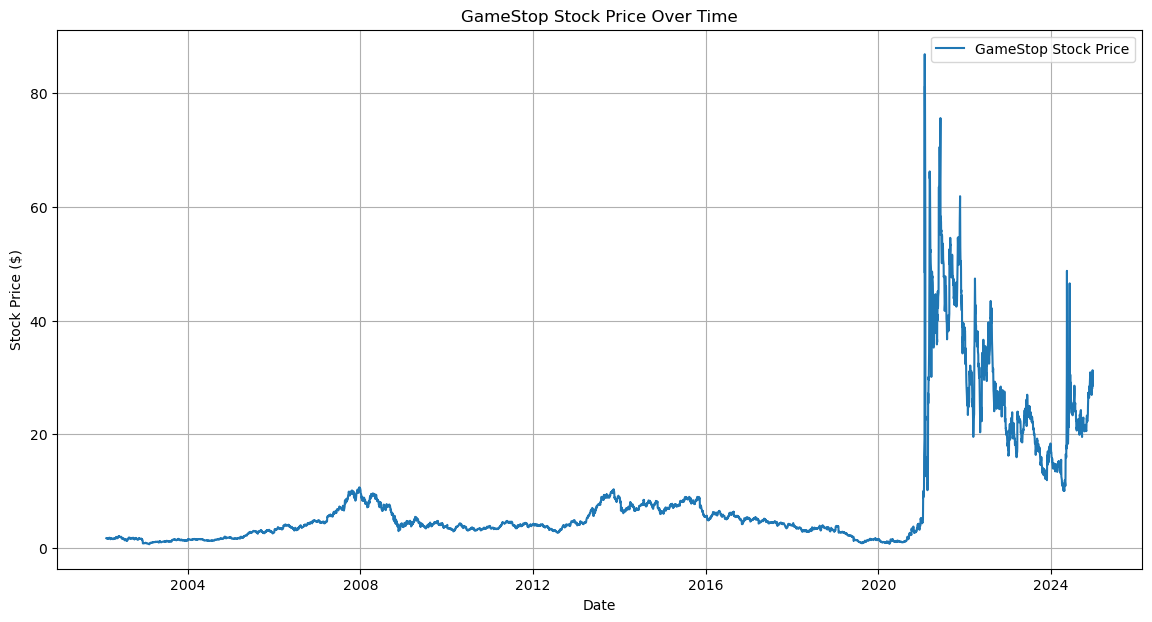

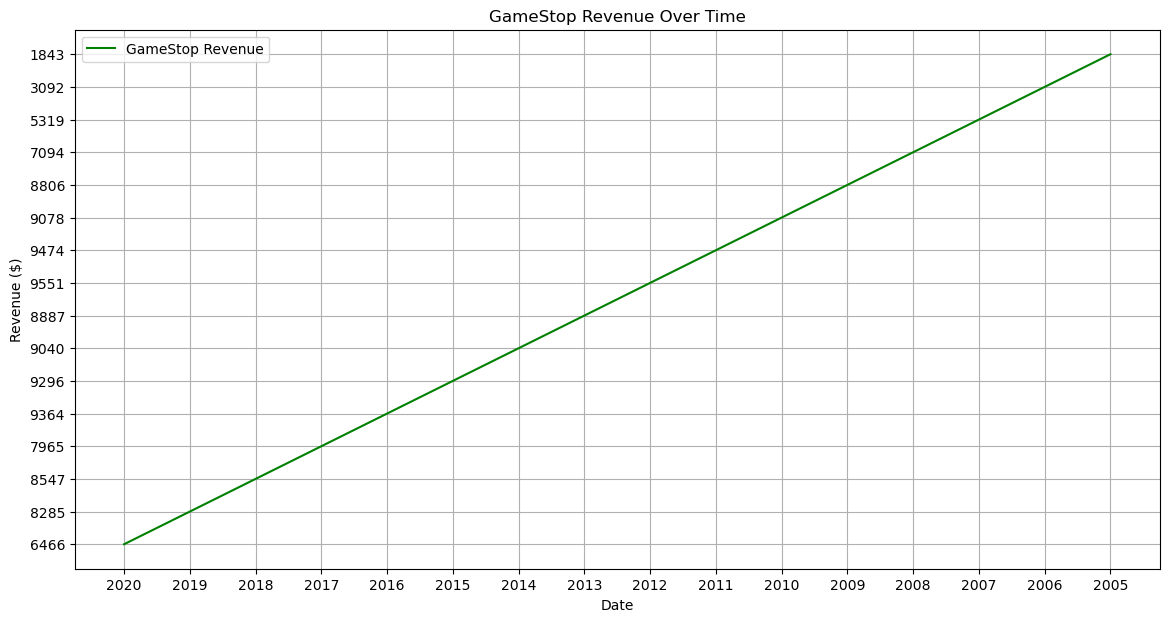

In [26]:
# Question 6 - GameStop Stock and Revenue Dashboard
plt.figure(figsize=(14, 7))
plt.plot(gme_data['Date'], gme_data['Close'], label='GameStop Stock Price')
plt.title("GameStop Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Stock Price ($)")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(gme_revenue['Date'], gme_revenue['Revenue'], label='GameStop Revenue', color='green')
plt.title("GameStop Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue ($)")
plt.legend()
plt.grid()
plt.show()

# --- End of Question 6 ---